# Visualization and Analysis Scripts

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import json
import seaborn as sns

## Data Statistics

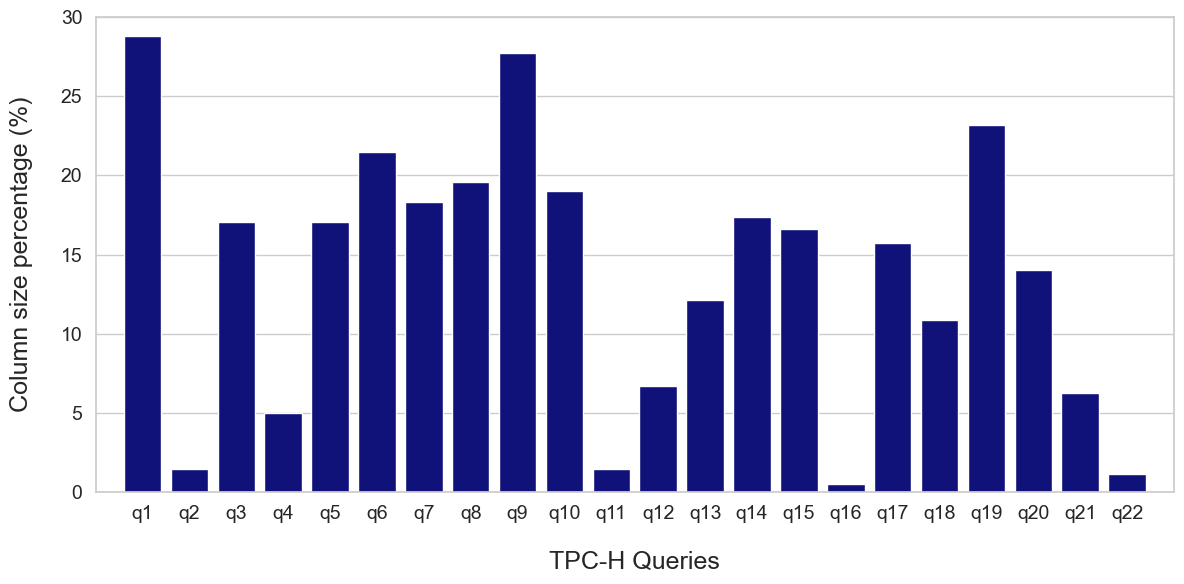

In [147]:
sns.set_style("whitegrid")  # Use whitegrid style

# 设置查询和百分比数据
queries = ['q'+str(i+1) for i in range(22)]
tpch_percentages = [28.79666889140659, 1.4719572708060051, 17.060497468586533, 4.980579900315204, 
               17.069131919348646, 21.48701494883383, 18.31107298447056, 19.57978139770934, 
               27.74155195100289, 18.99012524088393, 1.4297427787479766, 6.673514121622191, 
               12.141786416477302, 17.387274322860545, 16.622115484689825, 0.5004703076969211, 
               15.758696156242818, 10.867216187383075, 23.187125636544454, 14.032681290114388, 
               6.249143740546483, 1.1582253078428504]

# 创建一个数据框
data = pd.DataFrame({
    'Queries': queries,
    'Percentages': tpch_percentages
})

# 创建柱状图
plt.figure(figsize=(12,6))
sns.barplot(x='Queries', y='Percentages', data=data, color='darkblue')

plt.ylabel('Column size percentage (%)', fontsize=18, labelpad=20)
plt.xlabel('TPC-H Queries', fontsize=18, labelpad=20)

# 设置刻度大小
plt.tick_params(labelsize=14)
plt.xlim(-1, len(queries))
plt.ylim(0, 30)

# 显示图形
plt.tight_layout()
plt.savefig("./imgs/tpch_column_percentage.png")
plt.show()

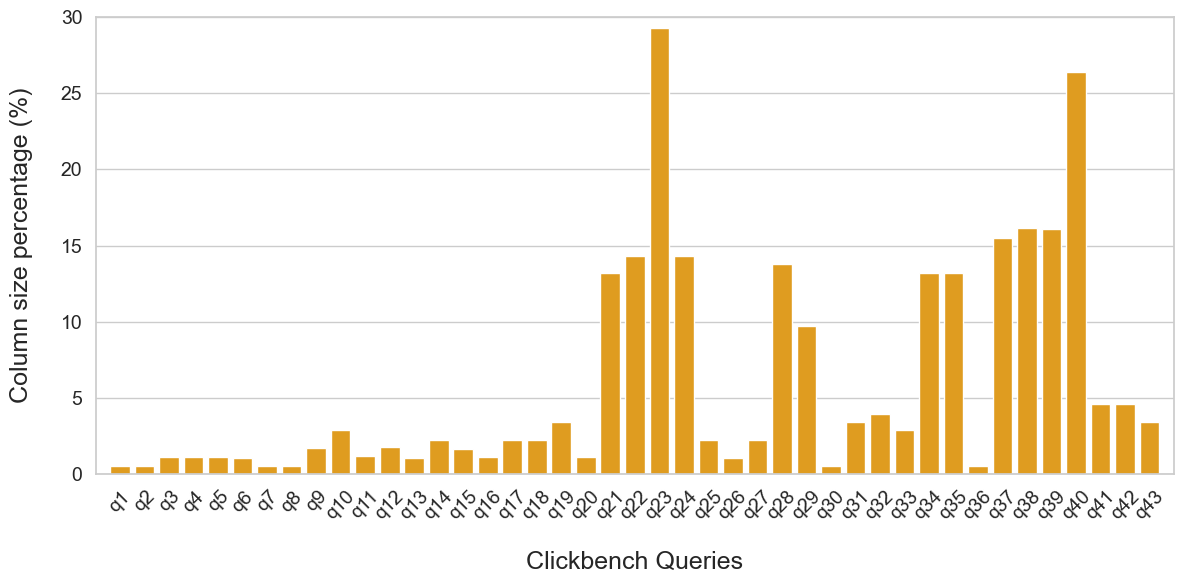

In [148]:
sns.set_style("whitegrid")  # Use whitegrid style

# 设置查询和百分比数据
queries = ['q'+str(i+1) for i in range(43)]
clickbench_percentages = [
    0.5765636422737905, 0.5765636422737905, 1.153127284547581, 1.153000914805662,
    1.153000914805662, 1.1029192752319634, 0.5764372725318714, 0.5765636422737905,
    1.7295645570794524, 2.8826918416270333, 1.2052917896714732, 1.7818554319452637,
    1.1029192752319634, 2.2559201900376253, 1.679482917505754, 1.153000914805662,
    2.2559201900376253, 2.2559201900376253, 3.4087947351013685, 1.153000914805662,
    13.191167313050867, 14.29408658828283, 29.291229255620856, 14.344041858114611,
    2.255793820295706, 1.1029192752319634, 2.255793820295706, 13.767730955324659,
    9.754799244433162, 0.5765636422737905, 3.409173844327125, 3.9856111168589967,
    2.8826918416270333, 13.191167313050867, 13.191167313050867, 0.5765636422737905,
    15.497295512404111, 16.150269951885605, 16.0738591546779, 26.405222041384857,
    4.612130028964566, 4.612256398706486, 3.4590027444169857
]

# 创建一个数据框
data = pd.DataFrame({
    'Queries': queries,
    'Percentages': clickbench_percentages
})

# 创建柱状图
plt.figure(figsize=(12,6))
sns.barplot(x='Queries', y='Percentages', data=data, color='orange')
plt.xticks(rotation=45)
plt.ylabel('Column size percentage (%)', fontsize=18, labelpad=20)
plt.xlabel('Clickbench Queries', fontsize=18, labelpad=20)

# 设置刻度大小
plt.tick_params(labelsize=14)
plt.xlim(-1, len(queries))
plt.ylim(0, 30)

# 显示图形
plt.tight_layout()
plt.savefig("./imgs/clickbench_column_percentage.png")
plt.show()

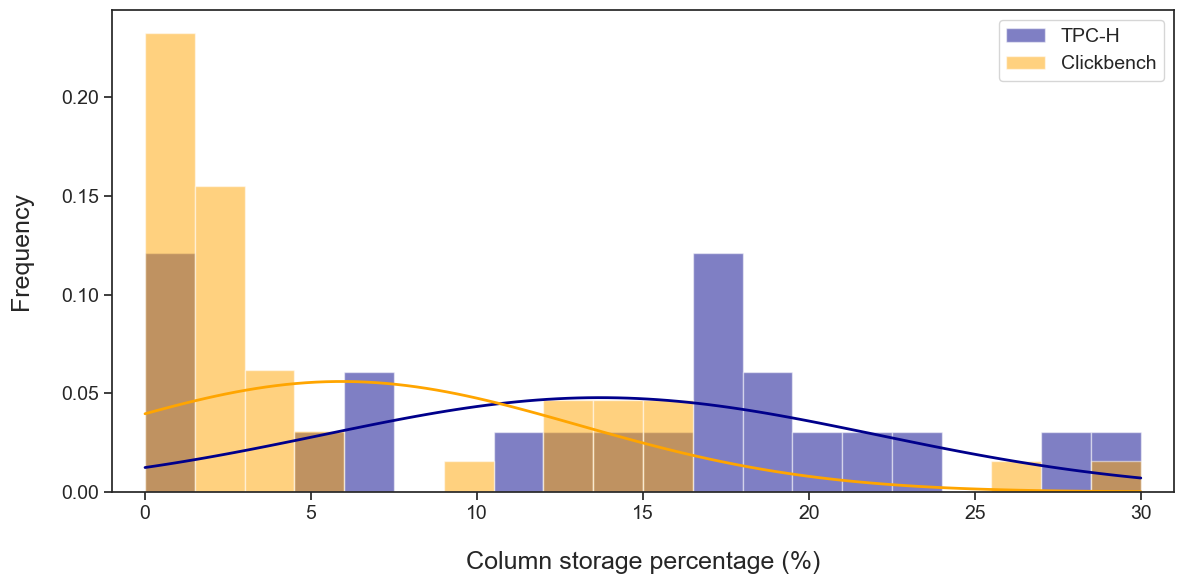

In [154]:
sns.set_style("ticks")  # Use whitegrid style

# 获取每个数据集的正态分布参数
mu1, std1 = norm.fit(tpch_percentages)
mu2, std2 = norm.fit(clickbench_percentages)

# 创建一个新的图形
plt.figure(figsize=(12,6))

# 画出每个数据集的存储使用率的直方图和拟合的正态分布曲线
plt.hist(tpch_percentages, bins=20, range=(0, 30), density=True, alpha=0.5, label='TPC-H', color='darkblue')
plt.hist(clickbench_percentages, bins=20, range=(0,30), density=True, alpha=0.5, label='Clickbench', color='orange')

xmin, xmax = 0, 30
x = np.linspace(xmin, xmax, 100)
p1 = norm.pdf(x, mu1, std1)
p2 = norm.pdf(x, mu2, std2)

plt.plot(x, p1, color='darkblue', linewidth=2)
plt.plot(x, p2, color='orange', linewidth=2)

# 添加图例
plt.legend(fontsize=14)

# 添加标题和标签
plt.xlabel('Column storage percentage (%)', fontsize=18, labelpad=20)
plt.ylabel('Frequency', fontsize=18, labelpad=20)
plt.xlim(-1, 31)
plt.tick_params(labelsize=14)

# 显示图形
plt.tight_layout()
plt.savefig("./imgs/distribution_column_percentage.png")
plt.show()

# Cost comparison

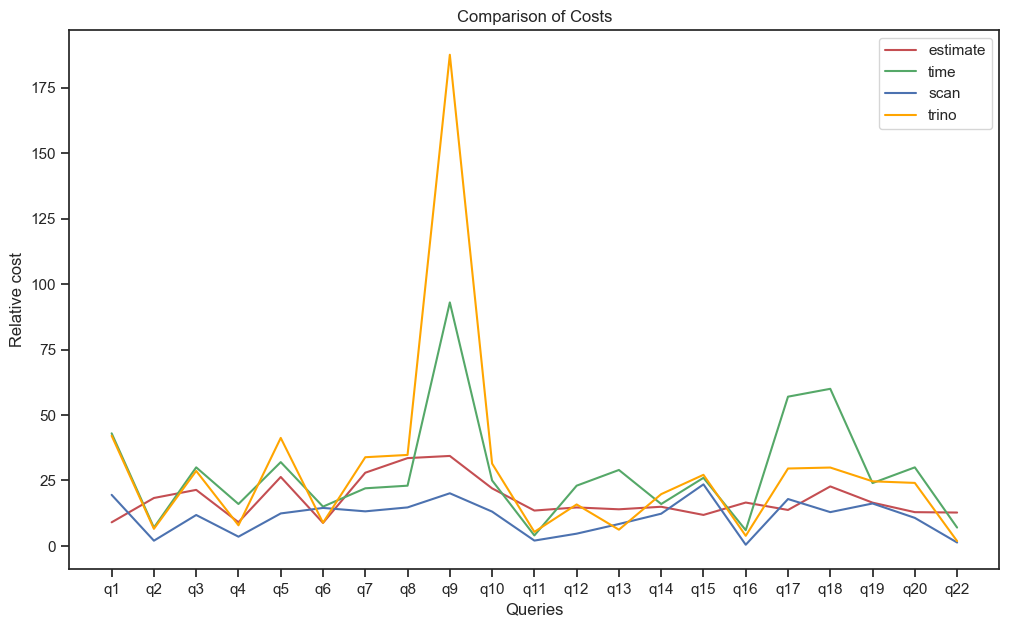

In [175]:
tpch_estimate_path = r"../stats/tpch_cost.json"
tpch_time_path = r"../stats/tpch_time.json"
tpch_scan_path = r"../stats/tpch_scan.json"
tpch_trino_path = r"../stats/tpch_trino.json"

with open(tpch_estimate_path) as f:
    estimate_cost = list(json.load(f).values())[0]
with open(tpch_time_path) as f:
    time_cost = list(json.load(f).values())[0]
with open(tpch_scan_path) as f:
    scan_cost = list(json.load(f).values())[0]
with open(tpch_trino_path) as f:
    trino_cost = list(json.load(f).values())[0]
    
plt.figure(figsize=(12,7))

plt.plot(estimate_cost, 'r', label='estimate')  
plt.plot(time_cost, 'g', label='time')  
plt.plot(scan_cost, 'b', label='scan')  
plt.plot(trino_cost, 'orange', label='trino')  

plt.legend()

plt.xlabel('Queries')
plt.ylabel('Relative cost')
plt.title('Comparison of Costs')
plt.xticks(range(len(estimate_cost)), ['q'+str(i) for i in range(1, 21)] + ['q22'])
# plt.savefig("./imgs/tpch_cost_comparison.png")
plt.show()

## Experiment results

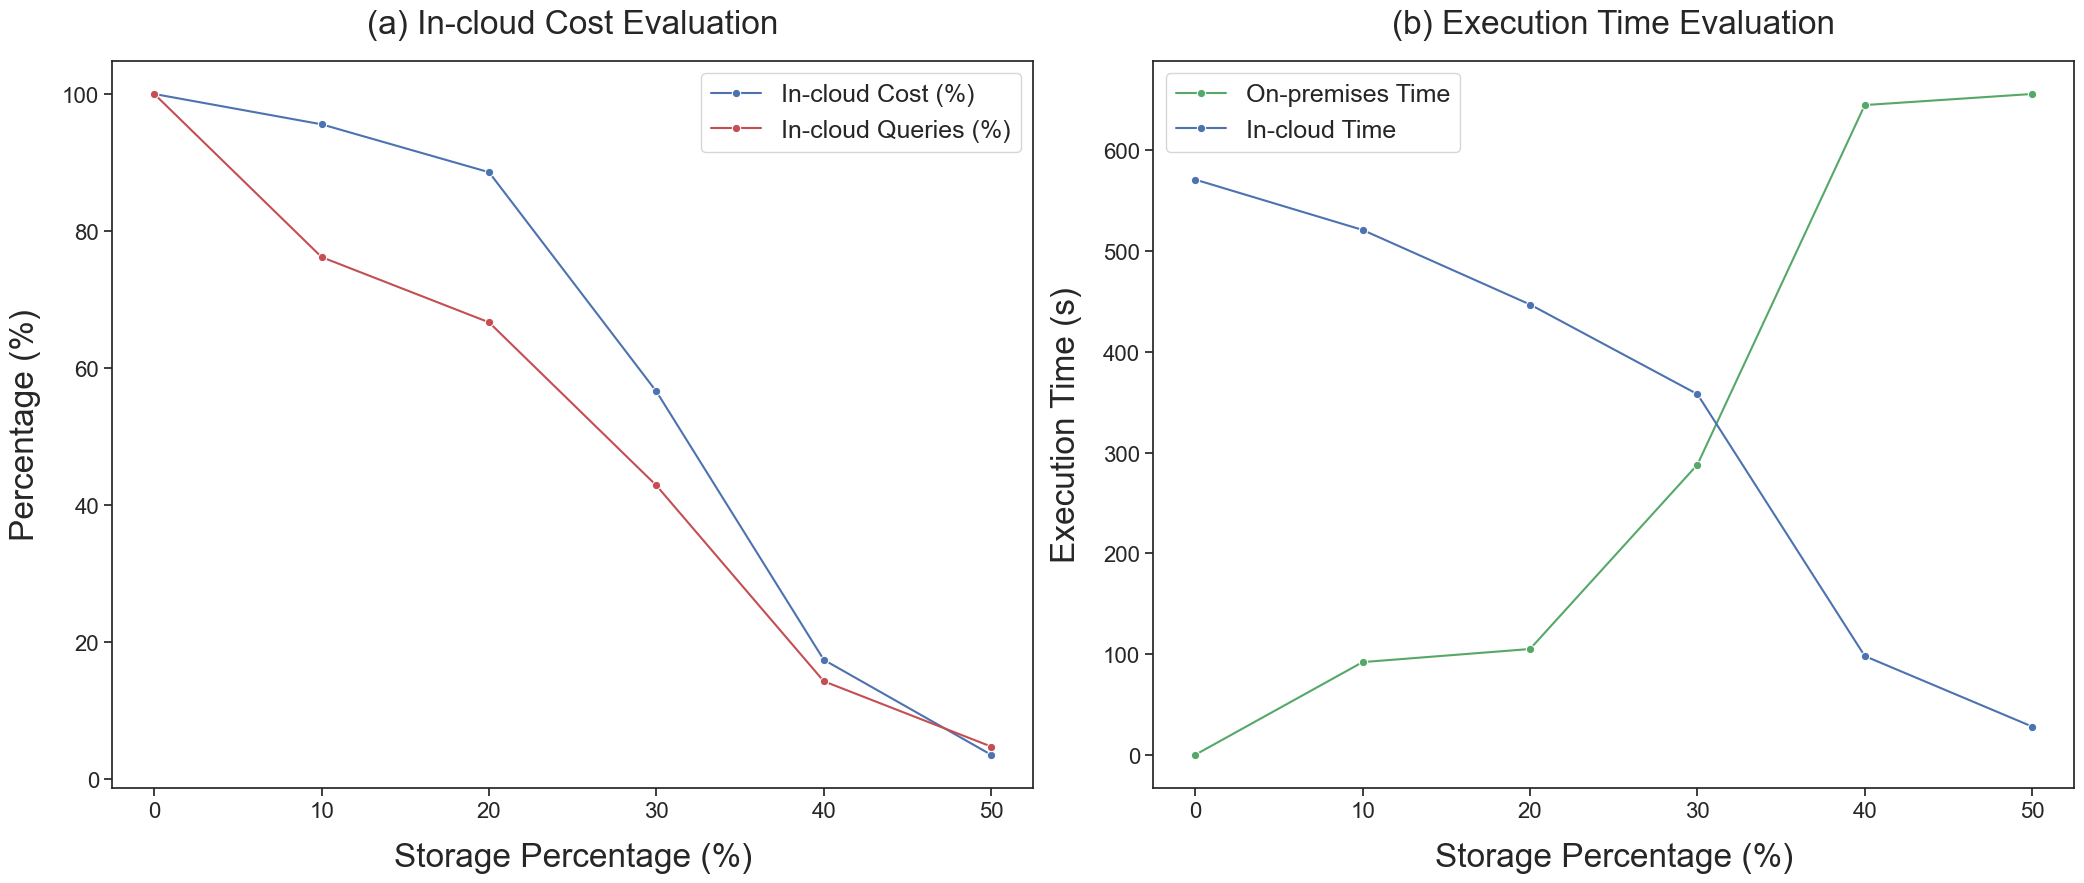

In [159]:
sns.set_theme(style="ticks")

x = [0, 10, 20, 30, 40, 50] # storage percentage
worker_time = [0, 92, 105, 288, 645, 656]
cloud_time = [571, 521, 447, 358, 98, 28]
cloud_cost = [100, 95.57, 88.58, 56.58, 17.42, 3.56] # cloud cost percentage
cloud_queries = [100, 76.19, 66.67, 42.86, 14.29, 4.76] # how many queries in-cloud execution

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(21, 9))

# First image
sns.lineplot(x=x, y=cloud_cost, marker='o', linestyle='-', color='b', label='In-cloud Cost (%)', ax=ax1)
sns.lineplot(x=x, y=cloud_queries, marker='o', linestyle='-', color='r', label='In-cloud Queries (%)', ax=ax1)
ax1.set_xlabel('Storage Percentage (%)', fontsize=24, labelpad=15)
ax1.set_ylabel('Percentage (%)', fontsize=24, labelpad=15)
ax1.tick_params(axis='both', which='major', labelsize=16)
ax1.legend(fontsize=18)
ax1.set_title('(a) In-cloud Cost Evaluation', fontsize=24, pad=20)

# Second image
sns.lineplot(x=x, y=worker_time, marker='o', linestyle='-', color='g', label='On-premises Time', ax=ax2)
sns.lineplot(x=x, y=cloud_time, marker='o', linestyle='-', color='b', label='In-cloud Time', ax=ax2)
ax2.set_xlabel('Storage Percentage (%)', fontsize=24, labelpad=15)
ax2.set_ylabel('Execution Time (s)', fontsize=24, labelpad=15)
ax2.tick_params(axis='both', which='major', labelsize=16)
ax2.legend(fontsize=18)
ax2.set_title('(b) Execution Time Evaluation', fontsize=24, pad=20)

plt.tight_layout()
plt.savefig("./imgs/tpch_combined_evaluation.png")

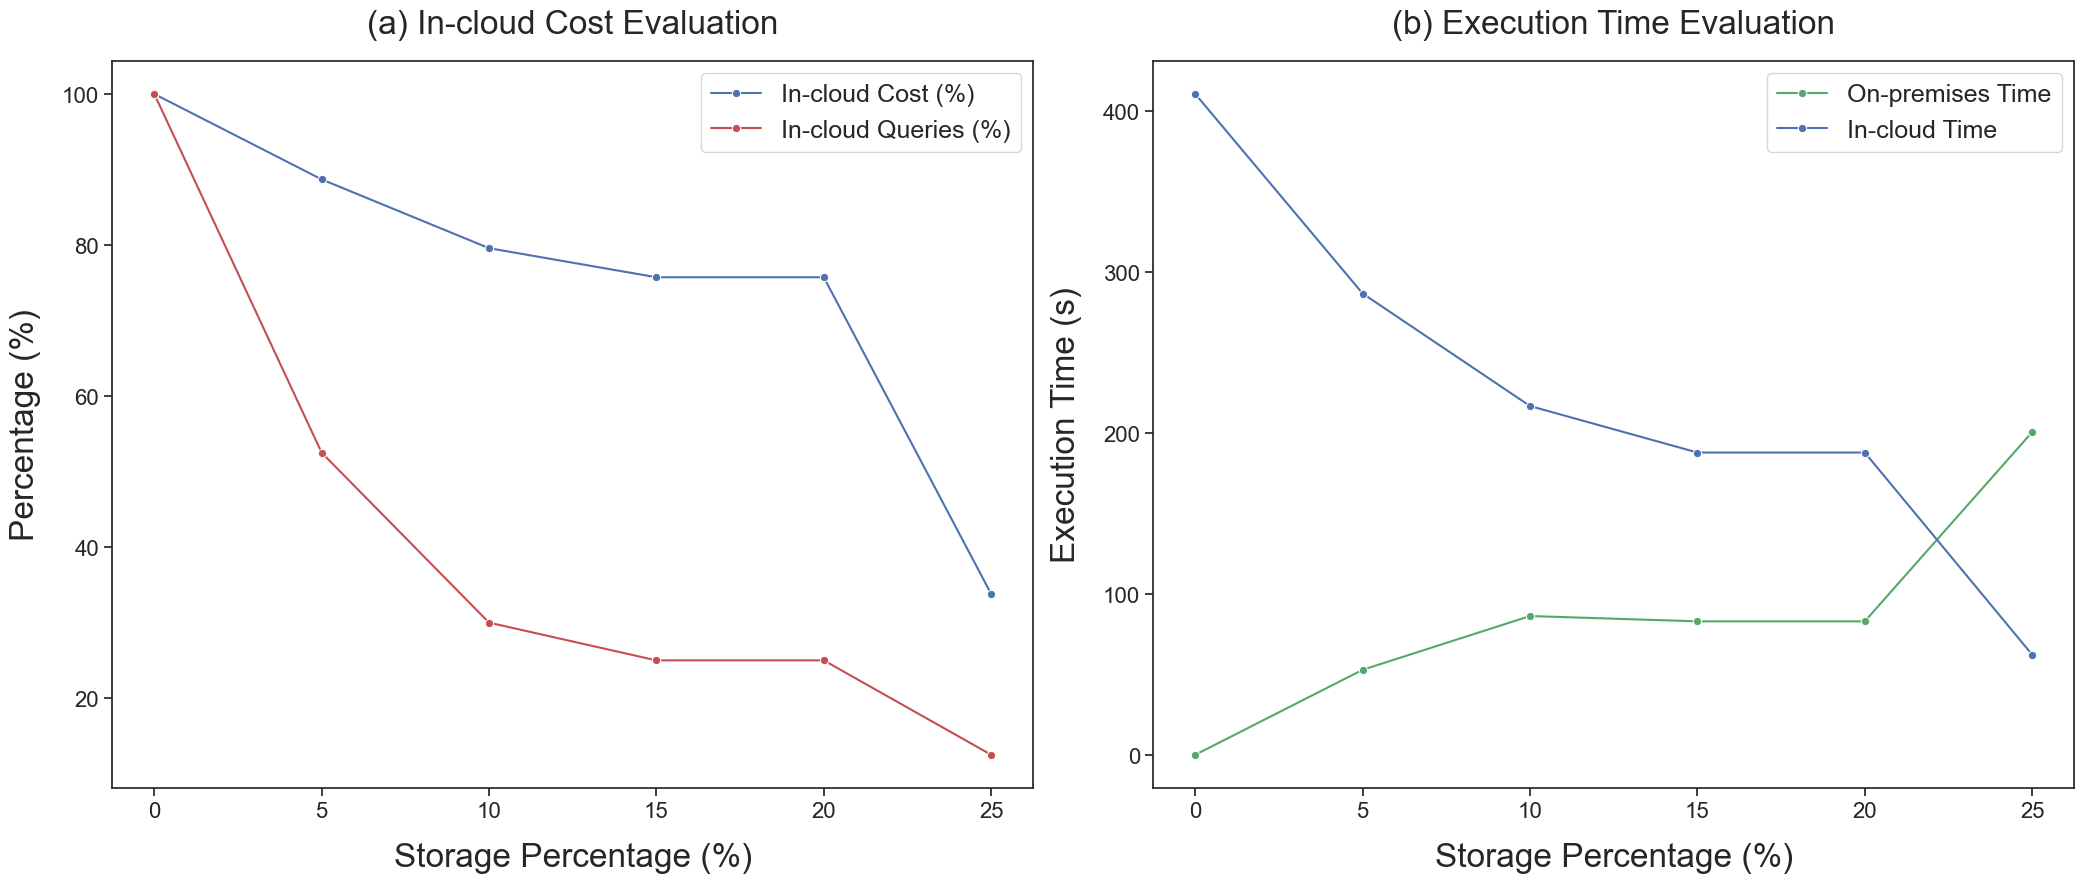

In [132]:
# clickbench cost-est 0-25
x = [0, 5, 10, 15, 20, 25] # storage percentage
worker_time = [0.09, 52.9, 86.3, 83, 83, 200.6]
cloud_time = [410.7, 286.7, 216.8, 187.9, 187.9, 62.3]
cloud_cost = [100, 88.69, 79.58, 75.73, 75.73, 33.8] # cloud cost percentage
cloud_queries = [100, 52.5, 30, 25, 25, 12.5] # how many queries in-cloud execution

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(21, 9))

# First image
sns.lineplot(x=x, y=cloud_cost, marker='o', linestyle='-', color='b', label='In-cloud Cost (%)', ax=ax1)
sns.lineplot(x=x, y=cloud_queries, marker='o', linestyle='-', color='r', label='In-cloud Queries (%)', ax=ax1)
ax1.set_xlabel('Storage Percentage (%)', fontsize=24, labelpad=15)
ax1.set_ylabel('Percentage (%)', fontsize=24, labelpad=15)
ax1.tick_params(axis='both', which='major', labelsize=16)
ax1.legend(fontsize=18)
ax1.set_title('(a) In-cloud Cost Evaluation', fontsize=24, pad=20)

# Second image
sns.lineplot(x=x, y=worker_time, marker='o', linestyle='-', color='g', label='On-premises Time', ax=ax2)
sns.lineplot(x=x, y=cloud_time, marker='o', linestyle='-', color='b', label='In-cloud Time', ax=ax2)
ax2.set_xlabel('Storage Percentage (%)', fontsize=24, labelpad=15)
ax2.set_ylabel('Execution Time (s)', fontsize=24, labelpad=15)
ax2.tick_params(axis='both', which='major', labelsize=16)
ax2.legend(fontsize=18)
ax2.set_title('(b) Execution Time Evaluation', fontsize=24, pad=20)

plt.tight_layout()
plt.savefig("./imgs/clickbench_combined_evaluation.png")

## Caching strategy comparison

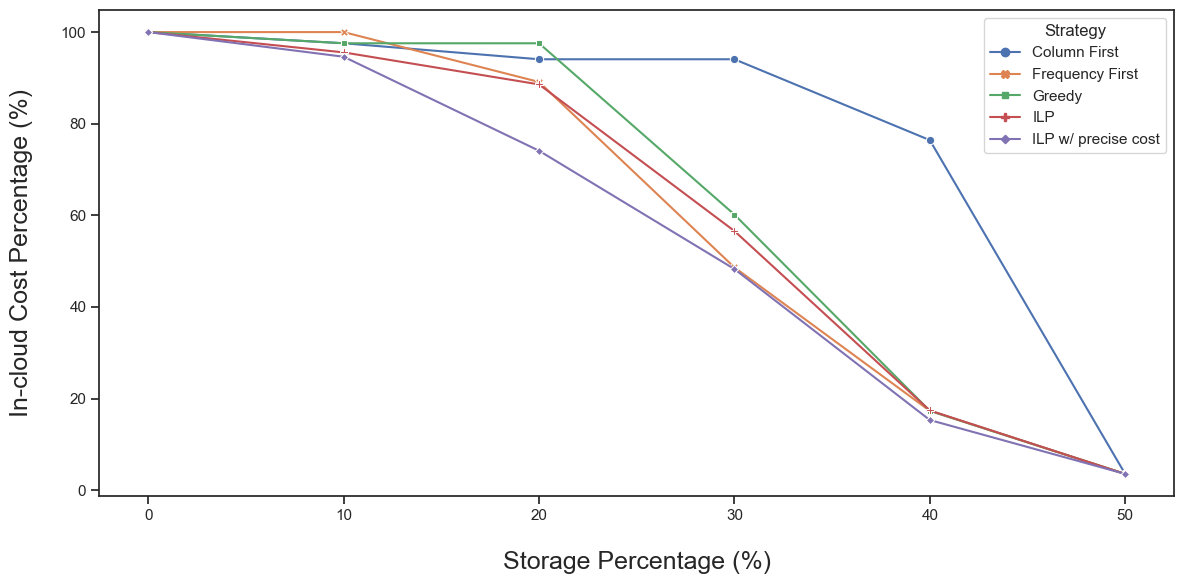

In [169]:
# tpch
x = [0, 10, 20, 30, 40, 50] # storage percentage
column_first_cost = [100, 97.56, 94.07, 94.07, 76.42, 3.56]
freq_first_cost = [100, 100, 89.11, 48.64, 17.34, 3.56]
greedy_cost= [100, 97.56, 97.56, 60.17, 17.34, 3.56]
est_cost = [100, 95.57, 88.58, 56.58, 17.42, 3.56]
scan_cost = [100, 94.62, 74.10, 48.28, 15.33, 3.56]

# Creating a dataframe
df = pd.DataFrame({
    'x': x*5,  # repeat x values for each of the cost categories
    'Cost': column_first_cost + freq_first_cost + greedy_cost + est_cost + scan_cost,  # concatenate all cost categories
    'Strategy': ['Column First']*len(x) + ['Frequency First']*len(x) + ['Greedy']*len(x) + ['ILP']*len(x) + ['ILP w/ precise cost']*len(x)
})

# Define the style of the plot
sns.set_style("ticks")

plt.figure(figsize=(12, 6))

# Create the line plot
sns.lineplot(x='x', y='Cost', hue='Strategy', style='Strategy', markers=True, dashes=False, data=df)

# Customize the axes and title
plt.xlabel('Storage Percentage (%)', fontsize=18, labelpad=20)
plt.ylabel('In-cloud Cost Percentage (%)', fontsize=18, labelpad=20)

# Save and show the plot
plt.tight_layout()
plt.savefig("./imgs/tpch_cache_strategy.png")
plt.show()

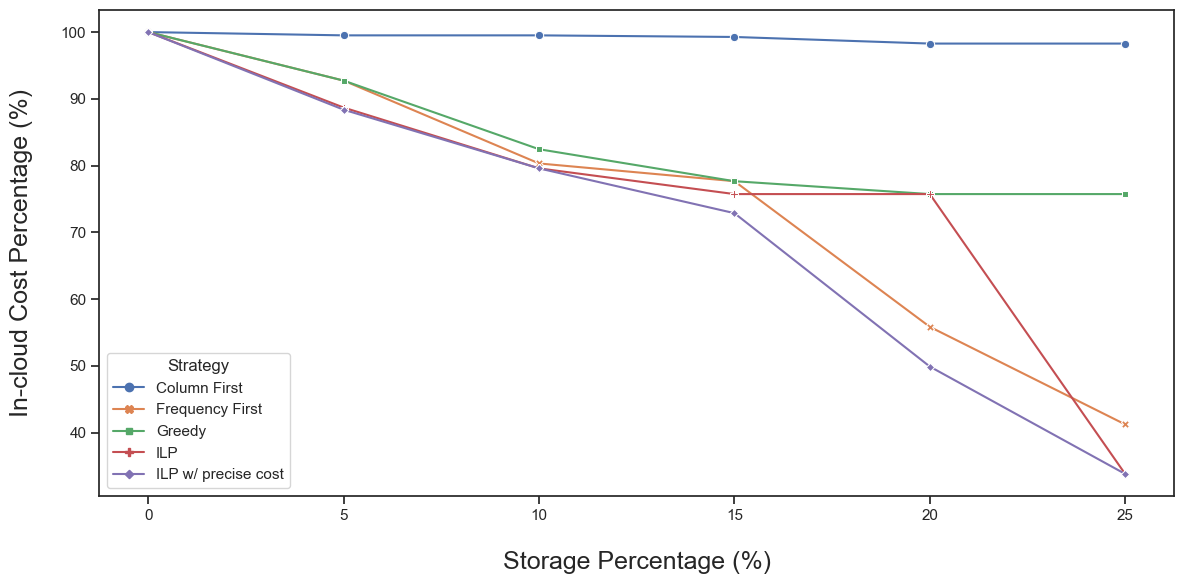

In [170]:
# clickbench
x = [0, 5, 10, 15, 20, 25] # storage percentage
column_first_cost = [100, 99.51, 99.51, 99.27, 98.28, 98.28]
freq_first_cost = [100, 92.73, 80.32, 77.66, 55.84, 41.22]
greedy_cost= [100, 92.73, 82.45, 77.66, 75.73, 75.73]
est_cost = [100, 88.69, 79.58, 75.73, 75.73, 33.8]
scan_cost = [100, 88.37, 79.58, 72.87, 49.89, 33.8]

# Creating a dataframe
df = pd.DataFrame({
    'x': x*5,  # repeat x values for each of the cost categories
    'Cost': column_first_cost + freq_first_cost + greedy_cost + est_cost + scan_cost,  # concatenate all cost categories
    'Strategy': ['Column First']*len(x) + ['Frequency First']*len(x) + ['Greedy']*len(x) + ['ILP']*len(x) + ['ILP w/ precise cost']*len(x)
})

# Define the style of the plot
sns.set_style("ticks")

plt.figure(figsize=(12, 6))

# Create the line plot
sns.lineplot(x='x', y='Cost', hue='Strategy', style='Strategy', markers=True, dashes=False, data=df)

# Customize the axes and title
plt.xlabel('Storage Percentage (%)', fontsize=18, labelpad=20)
plt.ylabel('In-cloud Cost Percentage (%)', fontsize=18, labelpad=20)

# Save and show the plot
plt.tight_layout()
plt.savefig("./imgs/clickbench_cache_strategy.png")
plt.show()